In [0]:
#Data source
#https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset

In [0]:
!pip install fastai2 -q

In [0]:
from fastai2.tabular.all import *

In [0]:
from google.colab import files
files.upload()

In [0]:
df=pd.read_csv('complete.csv')
df.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
1112,2020-04-19,Telengana,0,0,186,18.1124,79.0193,18,809
1113,2020-04-19,Tripura,0,0,1,23.9408,91.9882,0,2
1114,2020-04-19,Uttar Pradesh,0,0,86,26.8467,80.9462,14,969
1115,2020-04-19,Uttarakhand,0,0,9,30.0668,79.0193,0,42
1116,2020-04-19,West Bengal,0,0,62,22.9868,87.8550,12,310


In [0]:
import seaborn  as  sns
sns.set(style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


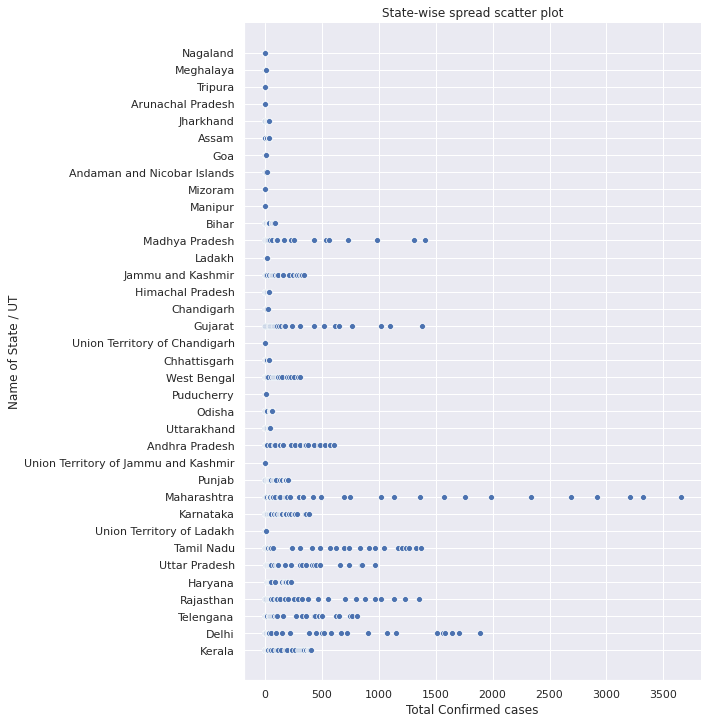

In [0]:
sns.relplot(x="Total Confirmed cases",y="Name of State / UT",height=10,data=df).set(title="State-wise spread scatter plot")


In [0]:
grp=df.groupby(by="Date")
dates=df['Date'].unique()
date_list=[]
for i in dates:
  date_list.append(i)
ddf=pd.DataFrame(date_list, columns=['Date'])

In [0]:
n=1
count_list=[]
labels=['Death','Total Confirmed cases','Cured/Discharged/Migrated']
for l in labels:
  for i in dates:
    d=grp.get_group(i)[l]
    count=d.sum()
    count_list.append(count)
  
  ddf.insert(n,l,count_list)
  n+=1
  count=0
  count_list=[]

In [0]:
ddf.head()

,Date,Death,Total Confirmed cases,Cured/Discharged/Migrated
0,2020-01-30,0,1,0
1,2020-01-31,0,1,0
2,2020-02-01,0,2,0
3,2020-02-02,0,3,0
4,2020-02-03,0,3,0


In [0]:
#the values on 2020-04-13 were erroneous, hence took the average of the adjacent values
def avg_val(l,val=74):
  new_val=(array(ddf[l])[val-1] + array(ddf[l])[val+1] )/2
  return int(new_val)

In [0]:
change_label=['Death','Total Confirmed cases','Cured/Discharged/Migrated']
for l in change_label:
  ddf.replace(to_replace=array(ddf[l])[74], value= avg_val(l),inplace=True )

In [0]:
ddf.tail()

,Date,Death,Total Confirmed cases,Cured/Discharged/Migrated
75,2020-04-15,377,11439,1306
76,2020-04-16,414,12380,1489
77,2020-04-17,452,13835,1767
78,2020-04-18,480,14378,1992
79,2020-04-19,507,15712,2231


In [0]:
ddf=ddf.drop([x for x in range(0,30)]) #dropping inital values were the case count was close to 0

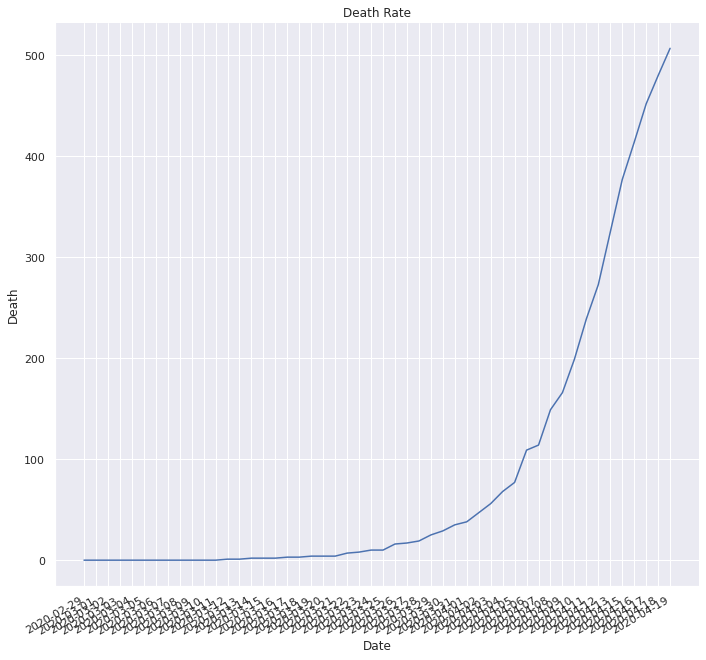

In [0]:
plot=sns.relplot(x="Date",y="Death",data=ddf,kind="line",height=10, estimator=None).set(title="Death Rate")
plot.fig.autofmt_xdate()

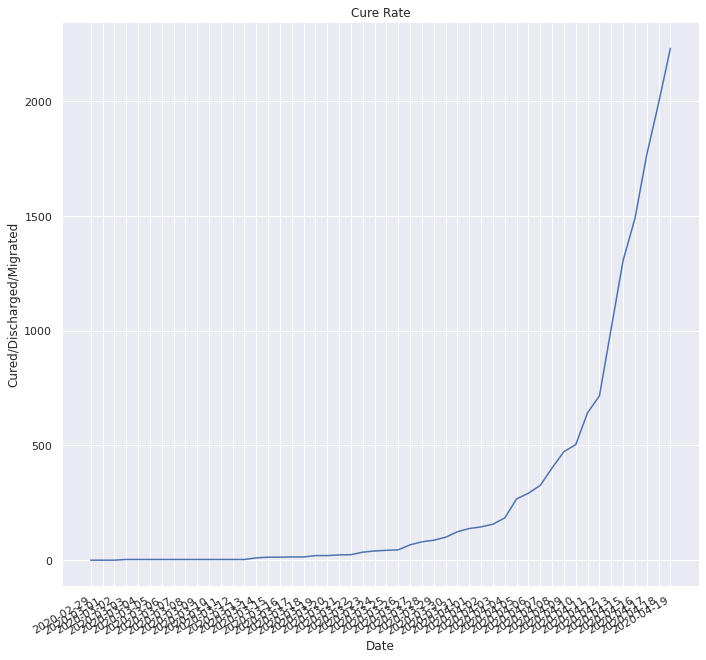

In [0]:
plot=sns.relplot(x="Date",y="Cured/Discharged/Migrated",data=ddf,kind="line",height=10, estimator=None).set(title="Cure Rate")
plot.fig.autofmt_xdate()

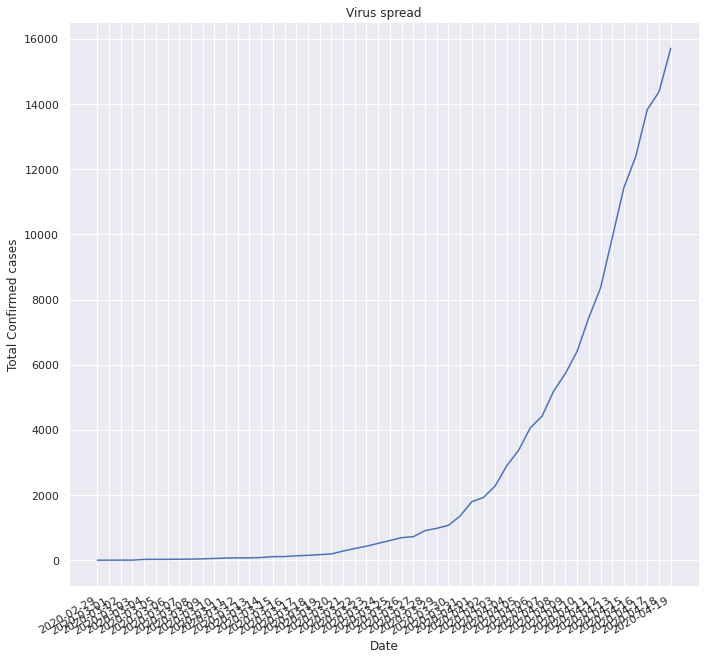

In [0]:
plot=sns.relplot(x="Date",y="Total Confirmed cases",data=ddf,kind="line",height=10, estimator=None).set(title="Virus spread")
plot.fig.autofmt_xdate()


In [0]:
import matplotlib.lines as mlines

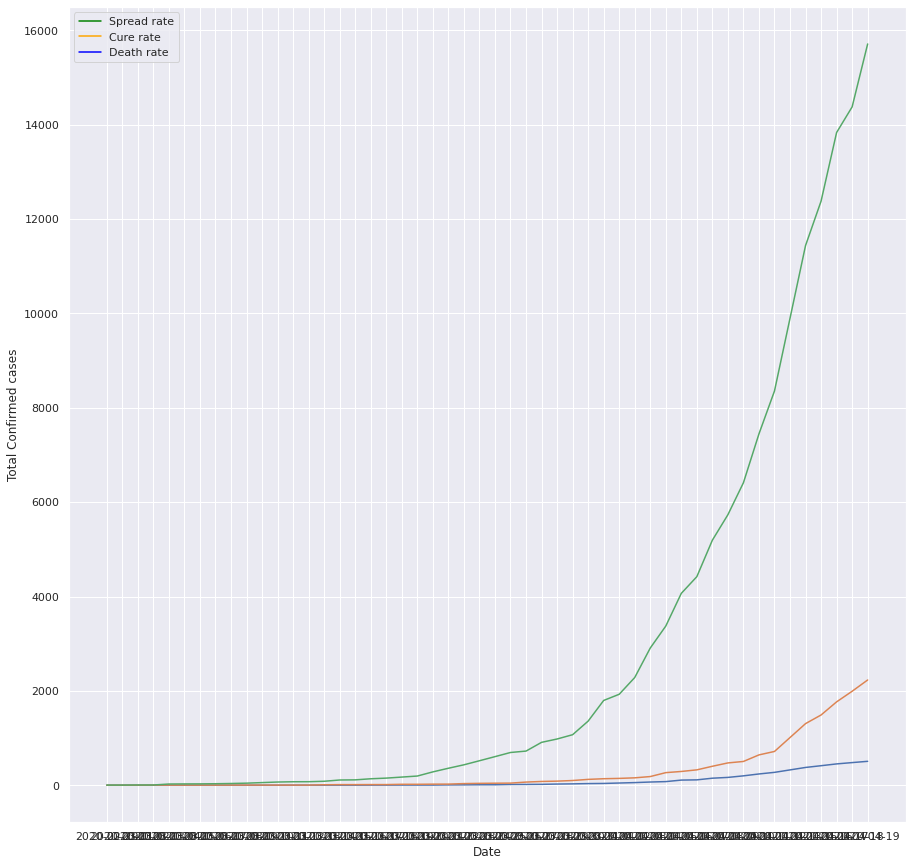

In [0]:
#comparative plot
plt.figure(figsize=(15,15))
sns.lineplot(x="Date",y="Death",data=ddf,estimator=None)
sns.lineplot(x="Date",y="Cured/Discharged/Migrated",data=ddf,estimator=None)
sns.lineplot(x="Date",y="Total Confirmed cases",data=ddf,estimator=None)

green_line = mlines.Line2D([], [], color='green',label='Spread rate')
orange_line = mlines.Line2D([], [], color='orange',label='Cure rate')
blue_line = mlines.Line2D([], [], color='blue',label='Death rate')
plt.legend(handles=[green_line, orange_line, blue_line])


In [0]:
state_group=df.groupby(by='Name of State / UT')
states=df['Name of State / UT'].unique()

In [0]:
state_case,state_death=[],[]
for s in states:
  c=df.loc[df['Name of State / UT']==s].iloc[-1]['Total Confirmed cases']
  d=df.loc[df['Name of State / UT']==s].iloc[-1]['Death']
  c=int(c)
  d=int(d)
  state_case.append(c)
  state_death.append(d)
  c=0
  d=0


In [0]:
state_df=pd.DataFrame(states, columns=['States'])
state_df.insert(1,'case_count',state_case)
state_df.insert(2,'Deaths',state_death)

In [0]:
#removing multiple copies of states and UT
for d in (7,11,18):
  state_df.drop(index=d,inplace=True)

In [0]:
total_cases=state_df['case_count'].sum();
total_cases

15712

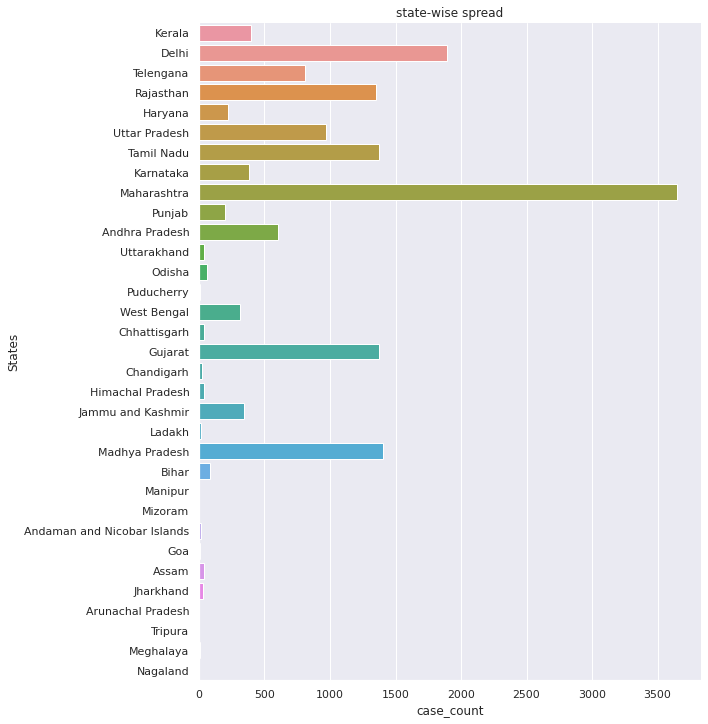

In [0]:
sns.catplot(y="States",x="case_count",data=state_df, kind="bar", height=10).set(title="state-wise spread")

Plotting on a map

In [0]:
!pip install geopandas -q

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 300kB/s 
     |████████████████████████████████| 10.4MB 45.1MB/s 


In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [0]:
#download shp file of India from the website below and upload it 
#https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127
gpath="/content/INDIA.shp"

In [0]:
map_df=gpd.read_file(gpath)
map_df

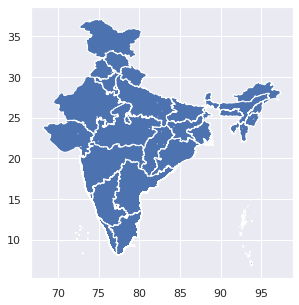

In [0]:
map_df.plot(figsize=(5,5))

In [0]:
gdf=state_df[['States','case_count']]

In [0]:
#making changes in state names to match as in that of the shape file
index=(22,1,14,20,28,15)
value=['Jammu And Kashmir','Nct Of Delhi','Orissa','CHANDIGARH','ANDAMAN AND NICOBAR ISLANDS','Pondicherry']
for i,v in zip(index,value):
  gdf=gdf.replace(to_replace=gdf['States'][i], value=v)

In [0]:
merge=map_df.set_index('ST_NAME').join(gdf.set_index('States'))
merge.head()

In [0]:
var='case_count'

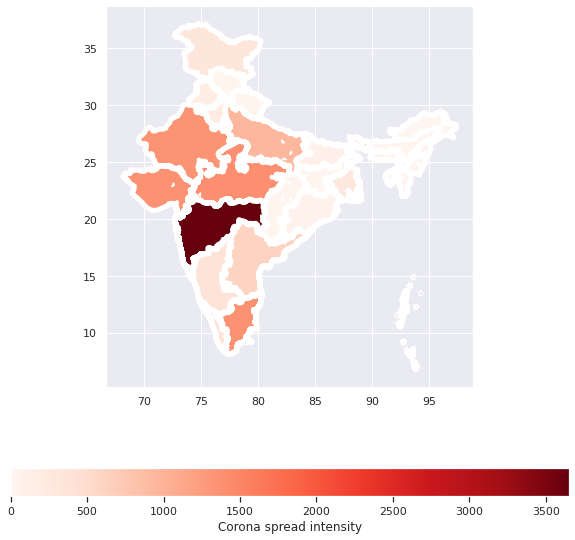

In [0]:
merge.plot(column=var, cmap='Reds',legend=True, figsize=(10,10),linewidth=5,
           legend_kwds={'label': "Corona spread intensity",
                        'orientation':"horizontal"})